In [321]:
# import the networkx library 
import networkx as nx
# importing the library to improve the graph
import matplotlib.pyplot as plt
# import numpy to do calculation
import numpy as np
import pylab
import math
%matplotlib inline

In [322]:
# Reading the graphml data
G = nx.read_graphml('../datasets/highschool_2012.graphml')

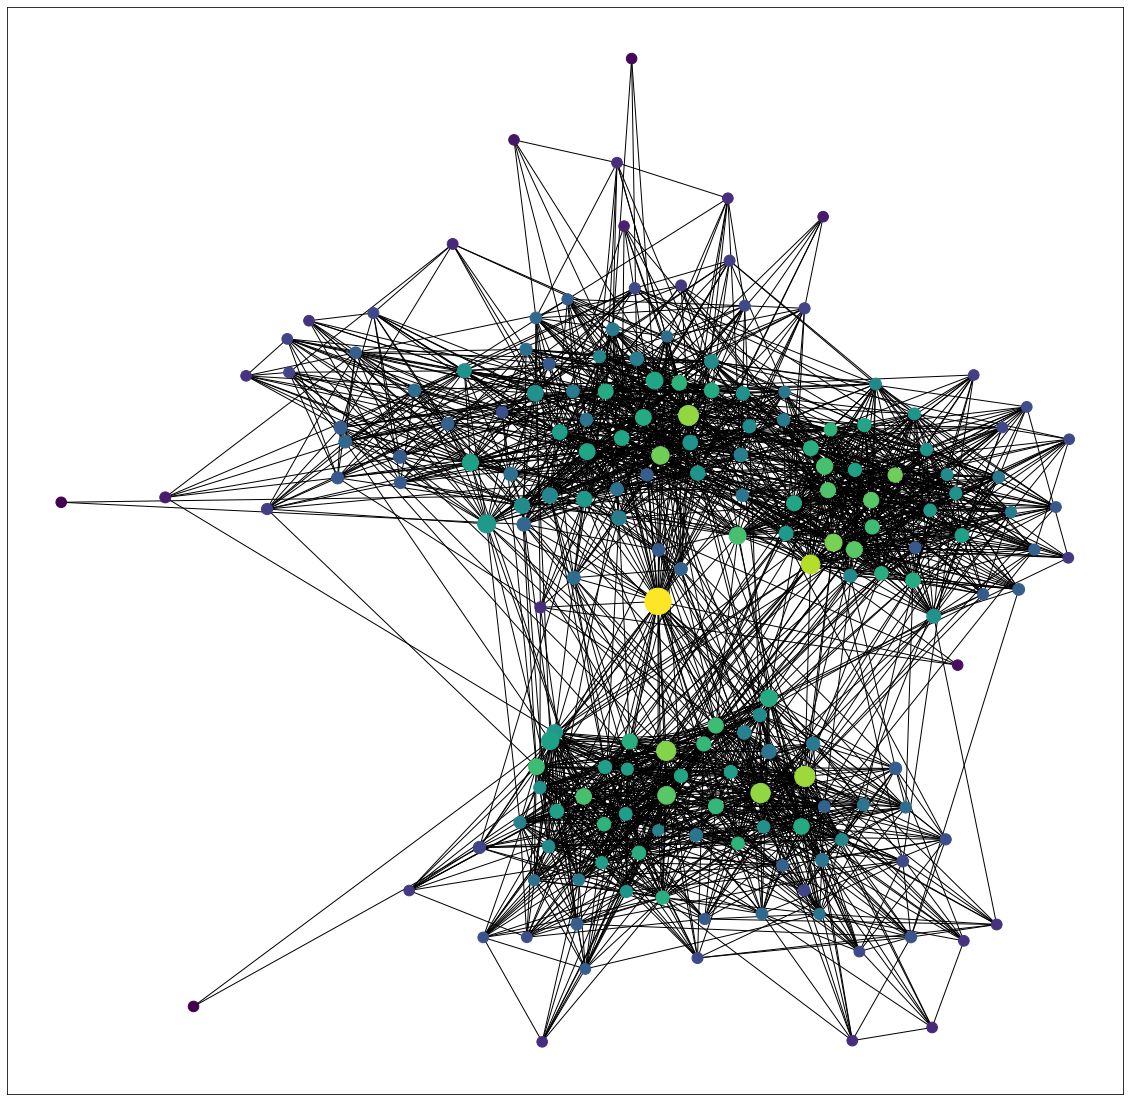

In [323]:
# drawing the network
pos = nx.spring_layout(G)
betCent = nx.betweenness_centrality(G, normalized=True, endpoints=True)
node_color = [200000.0 * G.degree(v) for v in G]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )

Q1) Which node in this network has the highest degree?

In [324]:
# to find the highest degree in the network
max_Degree = max(G.degree, key= lambda x: x[1])
# printing the highest degree in the network
print("The node that has the highest degree is: ", max_Degree)

The node that has the highest degree is:  ('826', 56)


Q2) Which node has the largest clustering coefficient?

In [325]:
# to sort the clustring
sorted(nx.clustering(G).items(), key = lambda x: x[1], reverse = True)
# to print the largest clustering cofficient in the network
print("The largest clustering cofficient is: ", max(nx.clustering(G).items(), key = lambda x: x[1]))

The largest clustering cofficient is:  ('647', 1.0)


Q3) What is the average clustering coefficient of the network?

In [326]:
# print the average clustring cofficient in the ntwork
print("The average clustering cofficient is: ", nx.average_clustering(G))

The average clustering cofficient is:  0.47520352183217995


Q4) Each node in this graph has a 'gender' attribute. Let's investigate and see if high school students are homophilous with respect to gender.

G.nodes[node]['gender']

In [327]:
# check how manu edges in the network
nEdges = G.number_of_nodes()
# check how many Male node in the network: 
males = []
for node,value in dict(G.nodes('gender')).items():
    if str(value) == "M":
        males.append(node)
# get the length of the male list
maleLength = len(males)
# divide the number of male nodes by the total node in the network
homo = maleLength / nEdges
# print the homophily
print("The homophily of the hight school student is: ", homo)

The homophily of the hight school student is:  0.7333333333333333


Q5) Now let's compute the expected number of edges in the null model where gender has no effect on edge creation. In a random network with the same number of edges and the same proportion of male and female nodes, how many M-M edges would we expect? Round to the nearest integer.

In [343]:
# number of edge in the network
edge = G.number_of_edges()
# divide the total edge by 2
edgeDividedBy2 = edge / 2
# store males node
males = []
# store femails node
femails = []
# a loop that goes over the nodes and store each node gender in his list
for node,value in dict(G.nodes('gender')).items():
    if str(value) == "M":
        males.append(node)
    elif str(value) == "F":
        femails.append(node)
# get the length of the male nodes
lengthMale = len(males)
# get the length of femails nodes
lengthFemaels = len(femails)
# get the persentage of males node
p = lengthMale / edgeDividedBy2
# get the persentage of femails node
q = lengthFemaels / edgeDividedBy2

# to get the M-M edge
p2 = float(p) * float(p)

# a function will round the number to the nearest integer 
def round_number(n):
    return int(n * 1000) / 1000

#print the M-M and round to the nearest integer
print("M-M edges we expect is: ", p2, "and after rounding to the nearest number is: ", round_number(p2))

M-M edges we expect is:  0.014141709276844414 and after rounding to the nearest number is:  0.014


Q6) How many F-F edges would we expect? (round to nearest integer)

In [344]:
# to get F-F edge
q2 = float(q) * float(q)
print("F-F edges we expect is: ", q2, "and after rounding to the nearest number is: ", round_number(q2))

F-F edges we expect is:  0.0018699780861943026 and after rounding to the nearest number is:  0.001


Q7) And how many F-M edges would we expect? (round to nearest integer)

In [346]:
# to get the F-M edge
twopq = (2 * (p * q))
print("F-M edges we expect is: ", twopq, "and after rounding to the nearest number is: ", round_number(twopq))

F-M edges we expect is:  0.010284879474068665 and after rounding to the nearest number is:  0.01


Q8) Now let's count the actual number of edges of each type. How many edges in this graph connect two nodes with 'M' as their 'gender' attribute?

Q9) How many edges connect two nodes with 'F' as their 'gender' attribute?

Q10) How many edges then connect nodes of different gender?

Q11) Given these counts as compared to the expected values, would you consider this evidence for or against a homophily bias in friendship relations among these highschoolers? Answer either For or Against.

Section 2: club membership network

In [200]:
# Reading the edglist data
GN = nx.read_edgelist('../datasets/club_membership.edgelist')

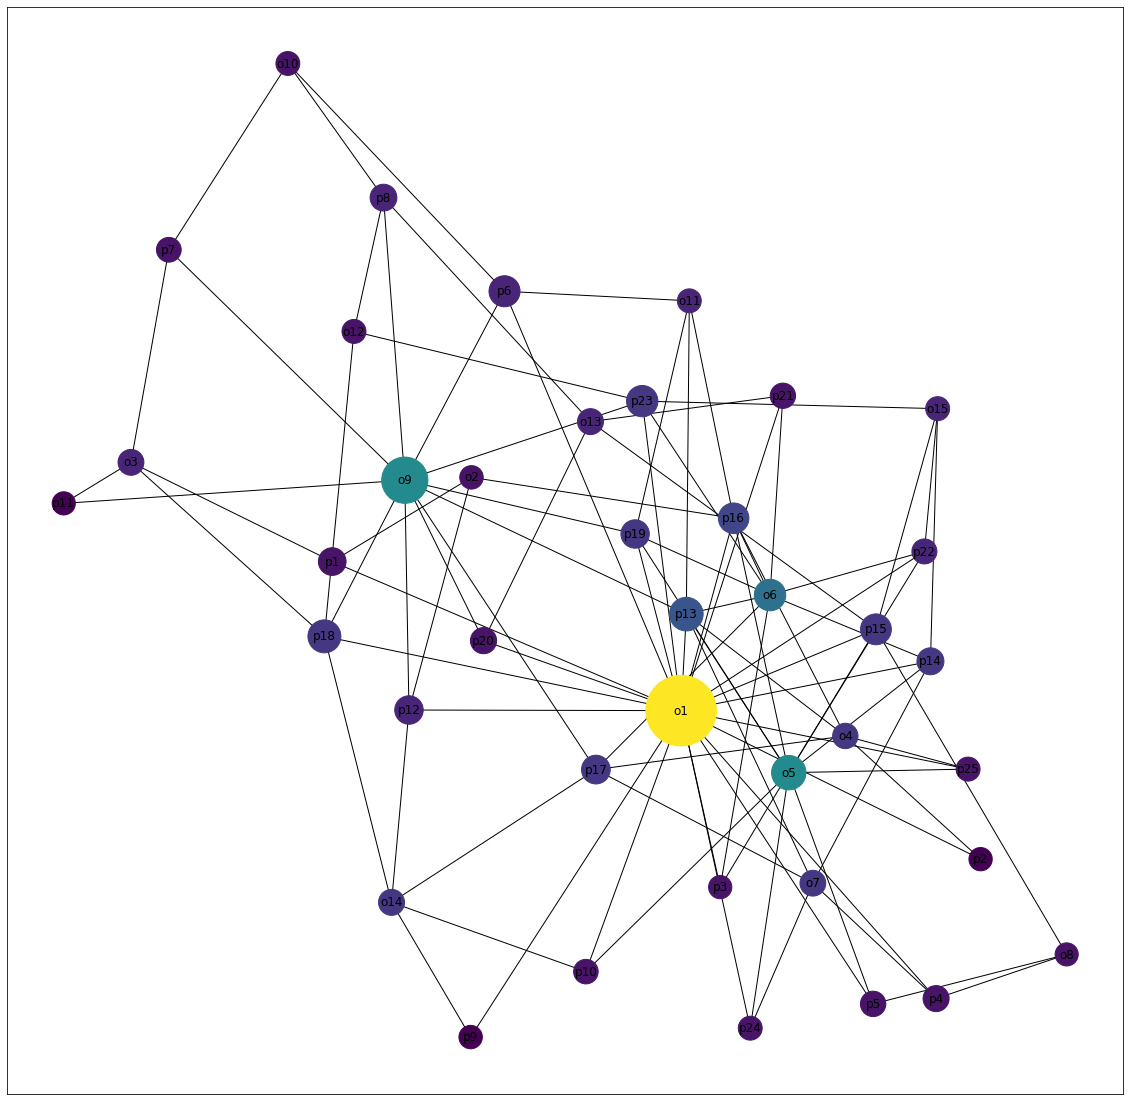

In [213]:
#drawing the network
pos = nx.spring_layout(GN)
betCent = nx.betweenness_centrality(GN, normalized=True, endpoints=True)
node_color = [20000.0 * GN.degree(v) for v in GN]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(GN, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size )

Q1) What is the mean number of organizational affiliations per person in the data set?

Q2) What is the mean number of members per organization?

In [232]:
members_per_organization = 0
memberOrg = []
for element in GN.nodes():
    if element[0] == 'o':
        print(GN[element])
        members_per_organization += len(GN[element])
        memberOrg.append(element)
print("The length of the member per organization: ", len(GN[element]))
mean_members_per_organization = members_per_organization / len(memberOrg)
print("The mean number of memebers per organization is: ", mean_members_per_organization)

{'p13': {}, 'p16': {}, 'p6': {}, 'p19': {}}
{'p20': {}, 'p15': {}, 'p8': {}, 'p21': {}}
{'p11': {}, 'p18': {}, 'p7': {}, 'p1': {}}
{'p11': {}, 'p12': {}, 'p18': {}, 'p23': {}, 'p20': {}, 'p13': {}, 'p8': {}, 'p17': {}, 'p6': {}, 'p19': {}, 'p7': {}}
{'p12': {}, 'p10': {}, 'p18': {}, 'p9': {}, 'p17': {}}
{'p12': {}, 'p10': {}, 'p18': {}, 'p23': {}, 'p21': {}, 'p4': {}, 'p25': {}, 'p20': {}, 'p2': {}, 'p19': {}, 'p14': {}, 'p1': {}, 'p16': {}, 'p9': {}, 'p6': {}, 'p22': {}, 'p24': {}, 'p5': {}, 'p3': {}, 'p13': {}, 'p15': {}}
{'p12': {}, 'p16': {}, 'p1': {}}
{'p10': {}, 'p22': {}, 'p16': {}, 'p25': {}, 'p13': {}, 'p3': {}, 'p5': {}, 'p24': {}, 'p15': {}, 'p14': {}, 'p19': {}}
{'p18': {}, 'p23': {}, 'p8': {}}
{'p22': {}, 'p16': {}, 'p13': {}, 'p3': {}, 'p17': {}, 'p21': {}, 'p14': {}, 'p23': {}, 'p19': {}}
{'p23': {}, 'p22': {}, 'p15': {}, 'p14': {}}
{'p4': {}, 'p17': {}, 'p13': {}, 'p14': {}, 'p24': {}}
{'p4': {}, 'p15': {}, 'p5': {}}
{'p25': {}, 'p2': {}, 'p16': {}, 'p17': {}, 'p13': {}

Q3) Please define a similarity measure for two nodes in a graph based on how many neighbors they have in common divided by the total number of all neighbors (don't overcount common neighbors ) of the two nodes.

In [265]:
commonNeighbors= []
for i,value in enumerate(memberOrg):
    for j in range(0,len(memberOrg)):
        if ((memberOrg[i] != memberOrg[j]) and (memberOrg[j] not in commonNeighbors)):
            print("The first value is: ", value,"The second value is: ", memberOrg[j])
            print("The common neighbors of the node is: ", sorted(nx.common_neighbors(GN,memberOrg[i],memberOrg[j])))
            commonNeighbors.append(value)
            

The first value is:  o11 The second value is:  o13
The common neighbors of the node is:  []
The first value is:  o11 The second value is:  o3
The common neighbors of the node is:  []
The first value is:  o11 The second value is:  o9
The common neighbors of the node is:  ['p13', 'p19', 'p6']
The first value is:  o11 The second value is:  o14
The common neighbors of the node is:  []
The first value is:  o11 The second value is:  o1
The common neighbors of the node is:  ['p13', 'p16', 'p19', 'p6']
The first value is:  o11 The second value is:  o2
The common neighbors of the node is:  ['p16']
The first value is:  o11 The second value is:  o5
The common neighbors of the node is:  ['p13', 'p16', 'p19']
The first value is:  o11 The second value is:  o12
The common neighbors of the node is:  []
The first value is:  o11 The second value is:  o6
The common neighbors of the node is:  ['p13', 'p16', 'p19']
The first value is:  o11 The second value is:  o15
The common neighbors of the node is:  []


Q4) Which pair of people has the highest similarity?

In [290]:
highest_sim = []
for i, element in enumerate(memberOrg):
    for j in range(0,len(memberOrg)):
        if memberOrg[i] == memberOrg[j]:
            pair = (value,memberOrg[j])
            highest_sim.append(value)
            print(pair)

('o10', 'o11')
('o10', 'o13')
('o10', 'o3')
('o10', 'o9')
('o10', 'o14')
('o10', 'o1')
('o10', 'o2')
('o10', 'o5')
('o10', 'o12')
('o10', 'o6')
('o10', 'o15')
('o10', 'o7')
('o10', 'o8')
('o10', 'o4')
('o10', 'o10')


Q5) What is the similarity value for this pair of people?

Q6) Which pair of organizations has the most similar membership?

Q7) What is the similarity value for that pair of organizations?